In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from scipy import stats
import pandas as pd
import numpy as np
import math
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 키 성장 예측

In [33]:
height_table = pd.read_excel('/content/drive/MyDrive/3차프로젝트/5.LMS_키성장예측/성장도표_데이터테이블(엑셀자료).xls')
height_table = height_table.iloc[1:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
height_table[['성별', '만나이(개월)']] = height_table[['성별', '만나이(개월)']].astype('int64')
height_table.columns = ['gender', 'age_month', 'L', 'M', 'S', '1st', '3rd', '5th', '10th', '15th', '25th', '50th', '75th', '85th', '90th', '95th', '97th', '99th']
height_table

,gender,age_month,L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th
1,1,0,1.0000,49.8842,0.0380,45.5,46.3,46.8,47.5,47.9,48.6,49.9,51.2,51.8,52.3,53,53.4,54.3
2,1,1,1.0000,54.7244,0.0356,50.2,51.1,51.5,52.2,52.7,53.4,54.7,56,56.7,57.2,57.9,58.4,59.3
3,1,2,1.0000,58.4249,0.0342,53.8,54.7,55.1,55.9,56.4,57.1,58.4,59.8,60.5,61,61.7,62.2,63.1
4,1,3,1.0000,61.4292,0.0333,56.7,57.6,58.1,58.8,59.3,60.1,61.4,62.8,63.5,64,64.8,65.3,66.2
5,1,4,1.0000,63.8860,0.0326,59,60,60.5,61.2,61.7,62.5,63.9,65.3,66,66.6,67.3,67.8,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2,223,-0.4881,160.8981,0.0308,149.9,152,153,154.7,155.9,157.6,160.9,164.3,166.2,167.4,169.4,170.6,173.1
453,2,224,-0.4959,160.9372,0.0308,150,152,153.1,154.8,155.9,157.6,160.9,164.3,166.2,167.5,169.4,170.7,173.1
454,2,225,-0.5037,160.9762,0.0307,150.1,152.1,153.1,154.8,156,157.7,161,164.4,166.2,167.5,169.4,170.7,173.1
455,2,226,-0.5116,161.0153,0.0307,150.1,152.1,153.2,154.9,156,157.7,161,164.4,166.3,167.5,169.5,170.7,173.2


In [34]:
# g = 성별, x = 예측 골연령, y = 현재 신장
def height_prediction(gender, bone_age, current_height):
  # 남자
  if gender == 'M':
    # 나이 개월수로 변환
    age = bone_age * 12

    # 예측 대상의 LMS 구하기
    MH_table = height_table.query(f"gender == 1 & age_month	== {int(age)}")
    L = [x for x in MH_table['L']][0]
    M = [x for x in MH_table['M']][0]
    S = [x for x in MH_table['S']][0]

    # 신장 예측 공식에 사용되는 18세의 LMS 구하기
    table_18 = height_table.query("gender ==1 & age_month == 227")
    L_18 = [x for x in table_18['L']][0]
    M_18 = [x for x in table_18['M']][0]
    S_18 = [x for x in table_18['S']][0]
    
    if L != 0:
      z_score = ((current_height/M)**L - 1) / (L*S)
      prediction = M_18 * (1+ L_18 * S_18 * z_score)**(1/L_18)
      return prediction

    else:
        z_score = int(np.log(current_height/M)) / S
        prediction = M_18 * np.exp(S_18 *z_score)
        return prediction

  # 여자
  if gender == 'F':
    age = bone_age * 12
    MH_table = height_table.query(f"gender == 2 & age_month	== {int(age)}")
    L = [x for x in MH_table['L']][0]
    M = [x for x in MH_table['M']][0]
    S = [x for x in MH_table['S']][0]

    # 신장 예측 공식에 사용되는 18세의 LMS 구하기
    table_18 = height_table.query("gender ==2 & age_month == 227")
    L_18 = [x for x in table_18['L']][0]
    M_18 = [x for x in table_18['M']][0]
    S_18 = [x for x in table_18['S']][0]
    
    if L != 0:
      z_score = ((current_height/M)**L - 1) / (L*S)
      prediction = M_18 * (1+ L_18 * S_18 * z_score)**(1/L_18)
      return prediction

    else:
        z_score = int(np.log(current_height/M)) / S
        prediction = M_18 * np.exp(S_18 *z_score)
        return prediction

In [35]:
height_prediction('M', 13, 165)

179.4782378867244

In [36]:
final_df = pd.read_csv('/content/drive/MyDrive/3차프로젝트/4.모델링_골연령예측/df_final.csv')
final_df

,No,gender,신장,골연령
0,1,M,88.9,3.249694
1,2,M,95.9,2.984606
2,3,M,88.2,2.590445
3,4,M,88.7,2.467192
4,5,M,90.8,4.184352
...,...,...,...,...
1223,661,F,168.6,16.328905
1224,662,F,164.8,16.176842
1225,663,F,172.1,15.616326
1226,664,F,162.9,16.507318


In [37]:
predictions = []

for i in range(len(final_df)):
  gender = final_df.loc[i, 'gender']
  bone_age = final_df.loc[i, '골연령']
  current_height = final_df.loc[i, '신장']

  predictions.append(height_prediction(gender, bone_age, current_height))
  

final_df['prediction'] = predictions
final_df

,No,gender,신장,골연령,prediction
0,1,M,88.9,3.249694,161.605788
1,2,M,95.9,2.984606,175.185251
2,3,M,88.2,2.590445,167.456352
3,4,M,88.7,2.467192,170.391669
4,5,M,90.8,4.184352,156.561843
...,...,...,...,...,...
1223,661,F,168.6,16.328905,169.459658
1224,662,F,164.8,16.176842,165.660534
1225,663,F,172.1,15.616326,173.435726
1226,664,F,162.9,16.507318,163.741326


In [ ]:
final_df.to_csv('/content/drive/MyDrive/3차프로젝트/5.LMS_키성장예측/final.csv')

In [38]:
final_df = pd.read_csv('/content/drive/MyDrive/3차프로젝트/5.LMS_키성장예측/final.csv').iloc[:,1:]
final_df

,No,gender,신장,골연령,prediction
0,1,M,88.9,3.249694,161.605788
1,2,M,95.9,2.984606,175.185251
2,3,M,88.2,2.590445,167.456352
3,4,M,88.7,2.467192,170.391669
4,5,M,90.8,4.184352,156.561843
...,...,...,...,...,...
1223,661,F,168.6,16.328905,169.459658
1224,662,F,164.8,16.176842,165.660534
1225,663,F,172.1,15.616326,173.435726
1226,664,F,162.9,16.507318,163.741326


# 시각화

In [39]:
final_df[final_df['gender'] == 'M'].value_counts

<bound method DataFrame.value_counts of       No gender     신장        골연령  prediction
0      1      M   88.9   3.249694  161.605788
1      2      M   95.9   2.984606  175.185251
2      3      M   88.2   2.590445  167.456352
3      4      M   88.7   2.467192  170.391669
4      5      M   90.8   4.184352  156.561843
..   ...    ...    ...        ...         ...
563  567      M  148.2  15.479754  157.481124
564  568      M  150.6  15.808282  157.741629
565  569      M  152.2  15.041150  161.557900
566  570      M  157.5  14.944349  165.337042
567  571      M  153.1  15.135531  161.857903

[568 rows x 5 columns]>

In [40]:
final_df[final_df['gender'] == 'F'].value_counts

<bound method DataFrame.value_counts of        No gender     신장        골연령  prediction
568     2      F   89.2   2.426300  160.065401
569     3      F   90.8   4.542970  144.147040
570     4      F   91.1   1.768453  173.737974
571     5      F   93.9   3.152951  158.510816
572     6      F   93.6   4.579678  147.423776
...   ...    ...    ...        ...         ...
1223  661      F  168.6  16.328905  169.459658
1224  662      F  164.8  16.176842  165.660534
1225  663      F  172.1  15.616326  173.435726
1226  664      F  162.9  16.507318  163.741326
1227  665      F  169.2  15.965986  170.153004

[660 rows x 5 columns]>

In [41]:
male = final_df.query("gender == 'M'")['prediction']
female = final_df.query("gender == 'F'")['prediction']

fig = go.Figure()
fig.add_trace(go.Histogram(x=male, name = 'male'))
fig.add_trace(go.Histogram(x=female, name = 'female'))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [42]:
male = final_df.query("gender == 'M'")['prediction']
female = final_df.query("gender == 'F'")['prediction']

hist_data = [male, female]
group_labels = ['male', 'female']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [43]:
# 이상치라고 생각되는 값 제거
final_df[final_df['prediction'] < 120]
final_without = final_df.drop(106, axis = 0)

In [44]:
male = final_without.query("gender == 'M'")['prediction']
female = final_without.query("gender == 'F'")['prediction']

hist_data = [male, female]

group_labels = ['male', 'female']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# 키 성장 도표 그래프로 확인

In [45]:
growth_chart = pd.read_excel('/content/drive/MyDrive/3차프로젝트/5.LMS_키성장예측/성장도표_수정본.xlsx', index_col = 'age_year')

def height_graph(chart,gender, BA, Height, col_range = 13):  
  # 1. 남여 구분
  m_chart = chart[:228]
  f_chart = chart[228:]

  # 2. 36개월(3세)부터 확인
  m_3to18 = m_chart[m_chart.index >= 3]  
  f_3to18 = f_chart[f_chart.index >= 3]  

  # 키 예측
  Pred_Height = height_prediction(gender, BA, Height)
  print('▶ 최종 예측 키 :',Height, '→', round(Pred_Height,1))
  
  ## 남자
  if gender == 'M' :
      df = m_3to18
      palette_color = 'YlGn'
  ## 여자
  elif gender == 'F' :
      df = f_3to18
      palette_color = 'Reds'

  ## 백분위 범위
  if col_range == 13 :
    columns = df.columns[6:]
  elif col_range == 3 :
    columns = ['3rd','50th','97th']

  ## Graph
  plt.figure(figsize= (10,14))
  sns.lineplot(data = df[columns], palette=palette_color, dashes = False)
  plt.grid(linestyle='--',color='k',linewidth=0.5)
  plt.legend(loc='upper left')
  plt.ylabel('Height')

  ## Current value Marking option
  plt.axvline(BA,color='k',linestyle='--', linewidth = 1.2)       # y line
  plt.axhline(Height,color='k',linestyle='--', linewidth = 1.2)   # x line
  plt.plot(BA, Height, marker="o", markersize=6, color="k")       # value marking
  plt.text(x=BA+1, y=Height-5, s=(f' Current Height  \n [ {BA} Y, {Height} cm ]'), alpha=1, color='k', fontsize = 15)
  
  ## Prediction value Marking option
  plt.axvline(18, color='r',linestyle='--', linewidth = 1.2)
  plt.axhline(Pred_Height,color='r',linestyle='--', linewidth = 1.2)
  plt.plot(18, Pred_Height, marker="o", markersize=6, color="r")
  plt.text(x=18-11, y=Pred_Height+5, s=(f' Prediction Height  \n [ {BA} Y, {round(Pred_Height,1)} cm ]'), alpha=1, color='r', fontsize = 15)

  ## Display range option
  plt.xticks(ticks = range(3,19))
  plt.yticks(ticks = range(80,201,10))
  for i in columns:
    plt.text(x=19, y=df[f'{i}'].iloc[-1]-0.5, s=f'{i}', alpha=1, color='#438cb9', fontsize=9)

▶ 최종 예측 키 : 110 → 163.0


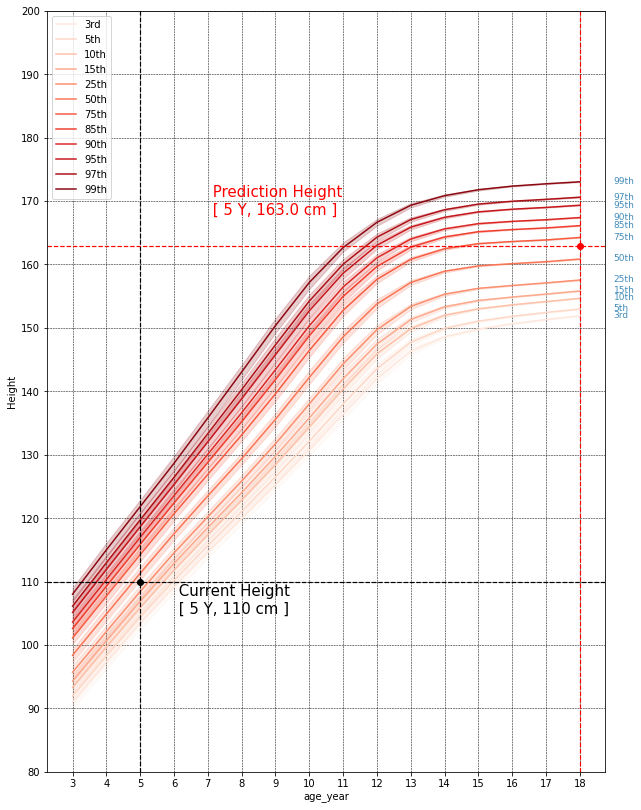

In [46]:
# 110cm 5살 여자 예측 키
height_graph(growth_chart, 'F', 5, 110)	

▶ 최종 예측 키 : 160 → 175.5


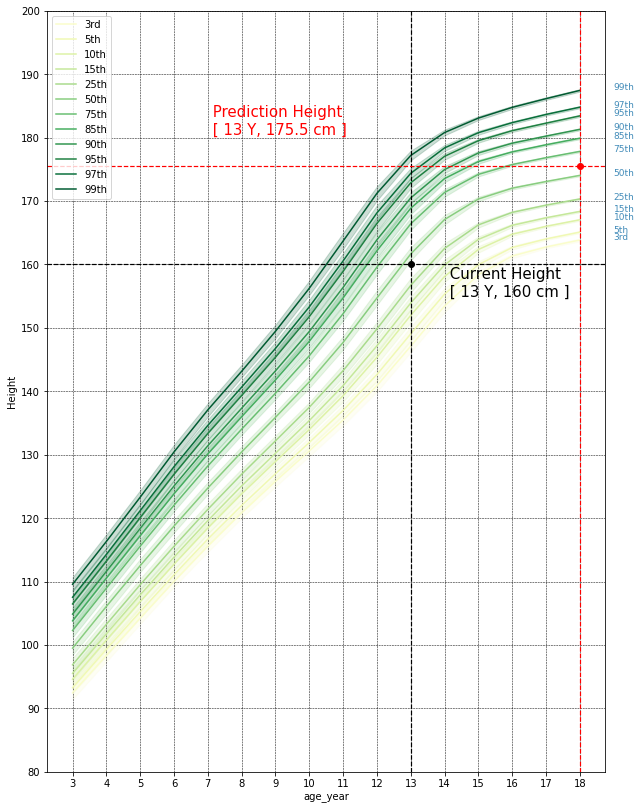

In [47]:
# 160cm 13살 남자 예측 키
height_graph(growth_chart, 'M', 13, 160)